## 프로젝트 : 다양한 OCR모델 비교하기
### OCR
***
#### Step1. 검증용 데이터셋 준비
-OCR 관련해서 오늘 다루어본 주제는 텍스트의 모양과 크기, 배치, 노이즈 등 OCR의 성능에 영향을 미치는 요인들에 관한 것이었습니다.  
-여러분들은 위 3가지 기능들이 이미지에 나타난 특징에 따라 얼마나 정확하게 문자를 detect하고 recognize하는지를 검증하기 위한 이미지 데이터를 모아야 합니다.  
-이미지가 많을수록 좋겠지만 검증해야 할 항목별로 고루 갖춰지는 것도 중요합니다. 
-가능하다면 함께 학습하는 동료들과 힘을 합쳐보는 것을 추천합니다.  
-그렇다고 너무 많은 이미지 데이터로 검증하는 것은 이후 결과를 정리하는 것이 힘들 수 있으니 테스트용 이미지는 아무리 많아도 20장을 넘기지 않는 것으로 합시다.  

#### Step2. Google OCR API, keras-ocr, Tesseract로 테스트 진행
-위 3가지 모듈을 활용하는 방법에 대해서는 코드 레벨로 이미 경험해 보셨을 것입니다.  
-이미지 리스트를 정리한 후 반복문을 실행하며 모듈이 출력한 결과를 모아 봅시다.  

#### Step3. 테스트 결과 정리
-모듈들마다 출력 형태가 다릅니다.  
-분석을 위해 결과를 일목요연하게 정리해 보는 것이 도움이 될 것입니다.  
-시각화 방법이 함께 활용된다면 더욱 좋겠군요.

#### Step4. 결과 분석과 결론 제시
-우선 여러분들이 구현하고자 하는 서비스의 목적과 내용을 먼저 정리합니다.  
-여러분들이 검토한 OCR 모델들이 그 목적에 부합하는지 확인하기 위해 필요한 평가기준을 제시합니다.  
-그 기준에 따라 위에서 정리한 테스트 결과를 분석하여 가장 나은 대안의 모델을 선정합니다. 

***
#### 평가문항
**1. OCR을 활용하여 구현하려는 서비스의 기획이 타당한가?**  
-목표로 하는 서비스가 OCR를 적용 가능하며, OCR을 활용했을 때 더욱 유용해진다.    

**2. 모델 평가기준이 명확하고 체계적으로 세워졌는가?**  
-평가 기준에 부합하는 테스트 데이터의 특징이 무엇인지 명확하게 제시되었다.   

**3. 평가기준에 따라 충분한 분량의 테스트가 진행되고 그 결과가 잘 정리되었는가?**  
-최대 20장까지의 테스트 이미지를 사용해 제시된 평가 기준에 따른 테스트 결과가 잘 정리되어 결론이 도출되었다.  
***
#### Step1. 검증용 데이터셋 준비 
VR기기와 연계하여 가게 간판이 찍혀있는 사진을 넣으면 구글맵을 통해 해당 거리를 거리뷰로 들어가 이를 VR기기로 전송해주는 시스템을 만들고자 한다.  
그러기 위해서는 간판의 사진을 입력했을 때 **가게의 이름이 명확히 인식**이 되어야한다.

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as img
import os
import pytesseract
from PIL import Image
from pytesseract import Output
import matplotlib.pyplot as plt
from glob import glob

import keras_ocr


fold_path = os.getenv('HOME')+'/aiffel/ocr_python/img/'
os.listdir(fold_path)

['t.jpg',
 'h.jpg',
 'a.jpg',
 'p.jpg',
 'j.jpg',
 'n.jpg',
 'g.jpg',
 'm.jpg',
 'i.jpg',
 'f.jpg',
 'd.jpg',
 'c.jpg',
 'r.jpg',
 'e.jpg',
 'k.jpg',
 'q.jpg',
 's.jpg',
 'b.jpg',
 'l.jpg',
 'o.jpg']

In [2]:
images_path = glob(fold_path+'*.jpg')
images_path

['/home/aiffel/aiffel/ocr_python/img/t.jpg',
 '/home/aiffel/aiffel/ocr_python/img/h.jpg',
 '/home/aiffel/aiffel/ocr_python/img/a.jpg',
 '/home/aiffel/aiffel/ocr_python/img/p.jpg',
 '/home/aiffel/aiffel/ocr_python/img/j.jpg',
 '/home/aiffel/aiffel/ocr_python/img/n.jpg',
 '/home/aiffel/aiffel/ocr_python/img/g.jpg',
 '/home/aiffel/aiffel/ocr_python/img/m.jpg',
 '/home/aiffel/aiffel/ocr_python/img/i.jpg',
 '/home/aiffel/aiffel/ocr_python/img/f.jpg',
 '/home/aiffel/aiffel/ocr_python/img/d.jpg',
 '/home/aiffel/aiffel/ocr_python/img/c.jpg',
 '/home/aiffel/aiffel/ocr_python/img/r.jpg',
 '/home/aiffel/aiffel/ocr_python/img/e.jpg',
 '/home/aiffel/aiffel/ocr_python/img/k.jpg',
 '/home/aiffel/aiffel/ocr_python/img/q.jpg',
 '/home/aiffel/aiffel/ocr_python/img/s.jpg',
 '/home/aiffel/aiffel/ocr_python/img/b.jpg',
 '/home/aiffel/aiffel/ocr_python/img/l.jpg',
 '/home/aiffel/aiffel/ocr_python/img/o.jpg']

In [3]:
img_name = []
for i in images_path:
    temp = i.split('/')
    img_name.append(temp[-1])

In [4]:
img_name

['t.jpg',
 'h.jpg',
 'a.jpg',
 'p.jpg',
 'j.jpg',
 'n.jpg',
 'g.jpg',
 'm.jpg',
 'i.jpg',
 'f.jpg',
 'd.jpg',
 'c.jpg',
 'r.jpg',
 'e.jpg',
 'k.jpg',
 'q.jpg',
 's.jpg',
 'b.jpg',
 'l.jpg',
 'o.jpg']

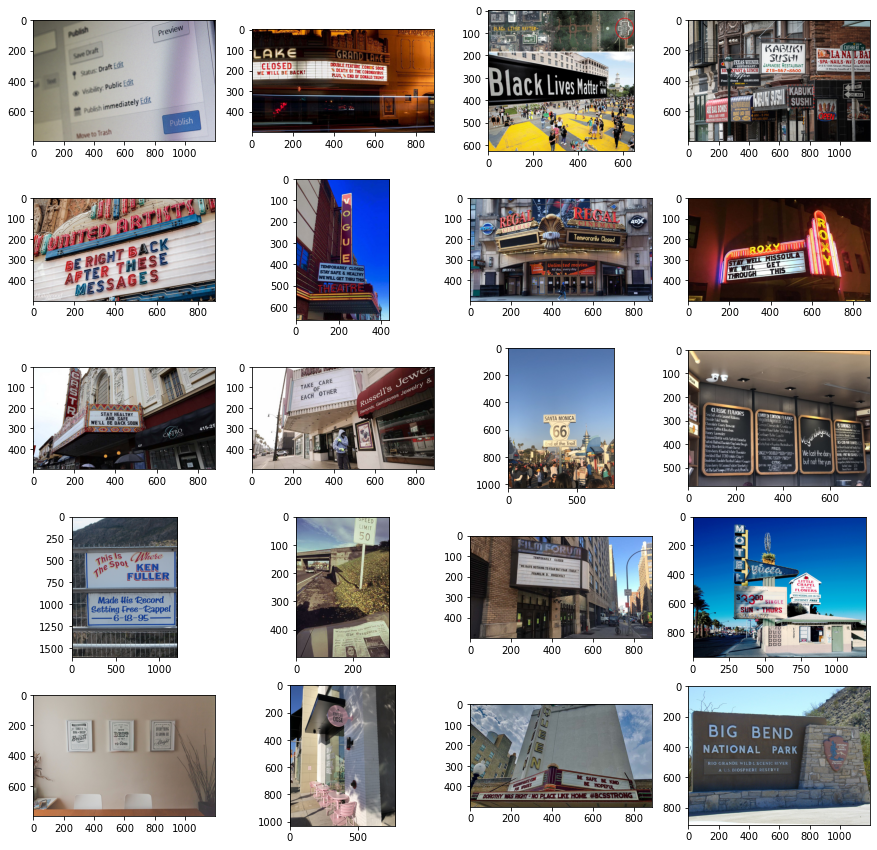

In [5]:
plt.figure(figsize=(15, 15))

for idx, image in enumerate(images_path):
    plt.subplot(5, 4, idx+1)
    im=img.imread(image)
    plt.imshow(im)

***
#### Step2. Google OCR API, keras-ocr, Tesseract로 테스트 진행
**Google OCR API**

In [6]:
def detect_text(path):
    """Detects text in the file."""
    from google.cloud import vision
    import io
    client = vision.ImageAnnotatorClient()

    with io.open(path, 'rb') as image_file:
        content = image_file.read()
        
    image = vision.Image(content=content)

    response = client.text_detection(image=image)
    texts = response.text_annotations
    print('Texts:')

    for text in texts:
       print('\n"{}"'.format(text.description))

    vertices = (['({},{})'.format(vertex.x, vertex.y)
                 for vertex in text.bounding_poly.vertices])

    print('bounds: {}'.format(','.join(vertices)))

    if response.error.message:
        raise Exception(
            '{}\nFor more info on error messages, check: '
            'https://cloud.google.com/apis/design/errors'.format(
                response.error.message))

In [7]:
# 다운받은 인증키 경로가 정확하게 지정되어 있어야 합니다. 
!ls -l $GOOGLE_APPLICATION_CREDENTIALS

import os
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] =  os.getenv('HOME')+'/aiffel/ocr_python/my_google_api_key.json'

# 입력 이미지 경로를 지정해 주세요.
# (예시) path = os.getenv('HOME')+'/aiffel/ocr_python/test_image.png'
for idx, image in enumerate(images_path):
    print(img_name[idx])
    detect_text(image)

-rw-rw-r-- 1 aiffel aiffel 2349  3월 11 11:17 /home/aiffel/aiffel/ocr_python/my_google_api_key.json
t.jpg
Texts:

"Publish
Preview
Save Draft
Status: Draft Edit
• Visibility: Public Edit
Publish immediately Edit
Move to Trash
Publish
"

"Publish"

"Preview"

"Save"

"Draft"

"Status:"

"Draft"

"Edit"

"•"

"Visibility:"

"Public"

"Edit"

"Publish"

"immediately"

"Edit"

"Move"

"to"

"Trash"

"Publish"
bounds: (891,658),(1047,637),(1054,690),(898,711)
h.jpg
Texts:

"LAKE
GRAND LAKE
CLOSED
WE WILL BE BACK!
DOUBLE FEATURE COMING SOON.
* DEATH OF THE CORONAVIRUS
PLUS, END OF DONALD TRUMP
SALUMT
CACHE
CASINO
OVER
PIOKUPL
"

"LAKE"

"GRAND"

"LAKE"

"CLOSED"

"WE"

"WILL"

"BE"

"BACK!"

"DOUBLE"

"FEATURE"

"COMING"

"SOON."

"*"

"DEATH"

"OF"

"THE"

"CORONAVIRUS"

"PLUS,"

"END"

"OF"

"DONALD"

"TRUMP"

"SALUMT"

"CACHE"

"CASINO"

"OVER"

"PIOKUPL"
bounds: (867,379),(886,379),(886,383),(867,383)
a.jpg
Texts:

"BLACA LIVES MATTER-
Black Lives hate
Lives Mater
PLZ
NW
ww
"

"BLACA"

"L

Texts:

"COFFEE
DOSE
"

"COFFEE"

"DOSE"
bounds: (317,230),(389,241),(384,274),(312,263)
l.jpg
Texts:

"OLEENORYANTY COM
FOR UPOATES
BE SAFE BE KIND
BE HOPEFUL
DOROTHY WAS RICHT NO PLACE LIKE HOME #BCSSTRONG
"

"OLEENORYANTY"

"COM"

"FOR"

"UPOATES"

"BE"

"SAFE"

"BE"

"KIND"

"BE"

"HOPEFUL"

"DOROTHY"

"WAS"

"RICHT"

"NO"

"PLACE"

"LIKE"

"HOME"

"#BCSSTRONG"
bounds: (580,430),(790,428),(790,457),(580,459)
o.jpg
Texts:

"BIG BEND
NATIONAL
PARK
SERVICE
NATIONAL PARK
Department
of the Interior
RIO GRANDE WILD & SCENIC RIVER
A U.S. BIOSPHERE RESERVE
"

"BIG"

"BEND"

"NATIONAL"

"PARK"

"SERVICE"

"NATIONAL"

"PARK"

"Department"

"of"

"the"

"Interior"

"RIO"

"GRANDE"

"WILD"

"&"

"SCENIC"

"RIVER"

"A"

"U.S."

"BIOSPHERE"

"RESERVE"
bounds: (472,540),(599,539),(599,558),(472,559)


20개 전체를 진행해 보았다.  
너무 많은 양의 텍스트가 출력되었다.  
h를 기준으로 출력해보도록 하겠다.

In [8]:
detect_text(images_path[1])

Texts:

"LAKE
GRAND LAKE
CLOSED
WE WILL BE BACK!
DOUBLE FEATURE COMING SOON.
* DEATH OF THE CORONAVIRUS
PLUS, END OF DONALD TRUMP
SALUMT
CACHE
CASINO
OVER
PIOKUPL
"

"LAKE"

"GRAND"

"LAKE"

"CLOSED"

"WE"

"WILL"

"BE"

"BACK!"

"DOUBLE"

"FEATURE"

"COMING"

"SOON."

"*"

"DEATH"

"OF"

"THE"

"CORONAVIRUS"

"PLUS,"

"END"

"OF"

"DONALD"

"TRUMP"

"SALUMT"

"CACHE"

"CASINO"

"OVER"

"PIOKUPL"
bounds: (867,379),(886,379),(886,383),(867,383)


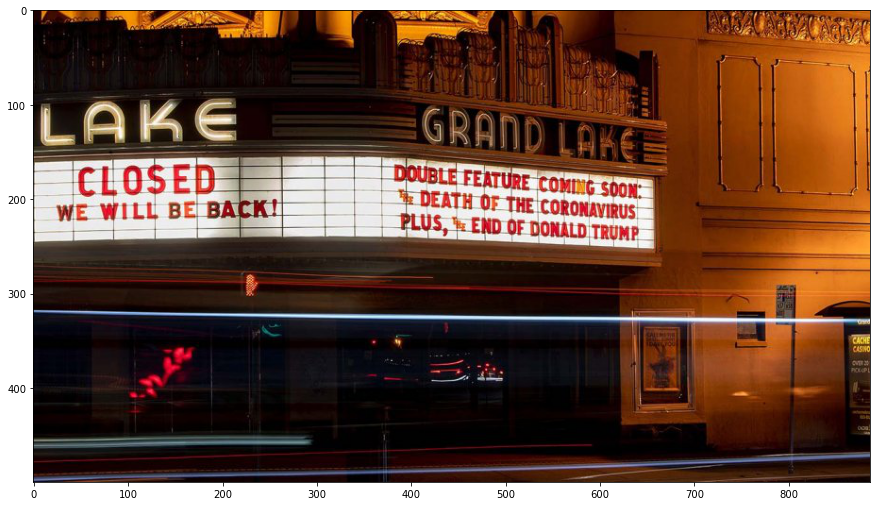

In [9]:
plt.figure(figsize=(15, 15))
im=img.imread(images_path[1])
plt.imshow(im)

사진과 비교해보았을 때 매우 높은 정확도를 가지는 것을 확인하였다.
***
**keras-ocr**

In [10]:
# keras-ocr이 detector과 recognizer를 위한 모델을 자동으로 다운로드받게 됩니다. 
pipeline = keras_ocr.pipeline.Pipeline()

Looking for /home/aiffel/.keras-ocr/craft_mlt_25k.h5
Instructions for updating:
Create a `tf.sparse.SparseTensor` and use `tf.sparse.to_dense` instead.
Looking for /home/aiffel/.keras-ocr/crnn_kurapan.h5


In [11]:
images = [ keras_ocr.tools.read(im) for im in images_path]
predictions = [pipeline.recognize([im]) for im in images_path]

/home/aiffel/anaconda3/envs/aiffel/lib/python3.7/site-packages/keras_ocr/tools.py:166: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  horizontalalignment='right' if side == 'left' else 'left')


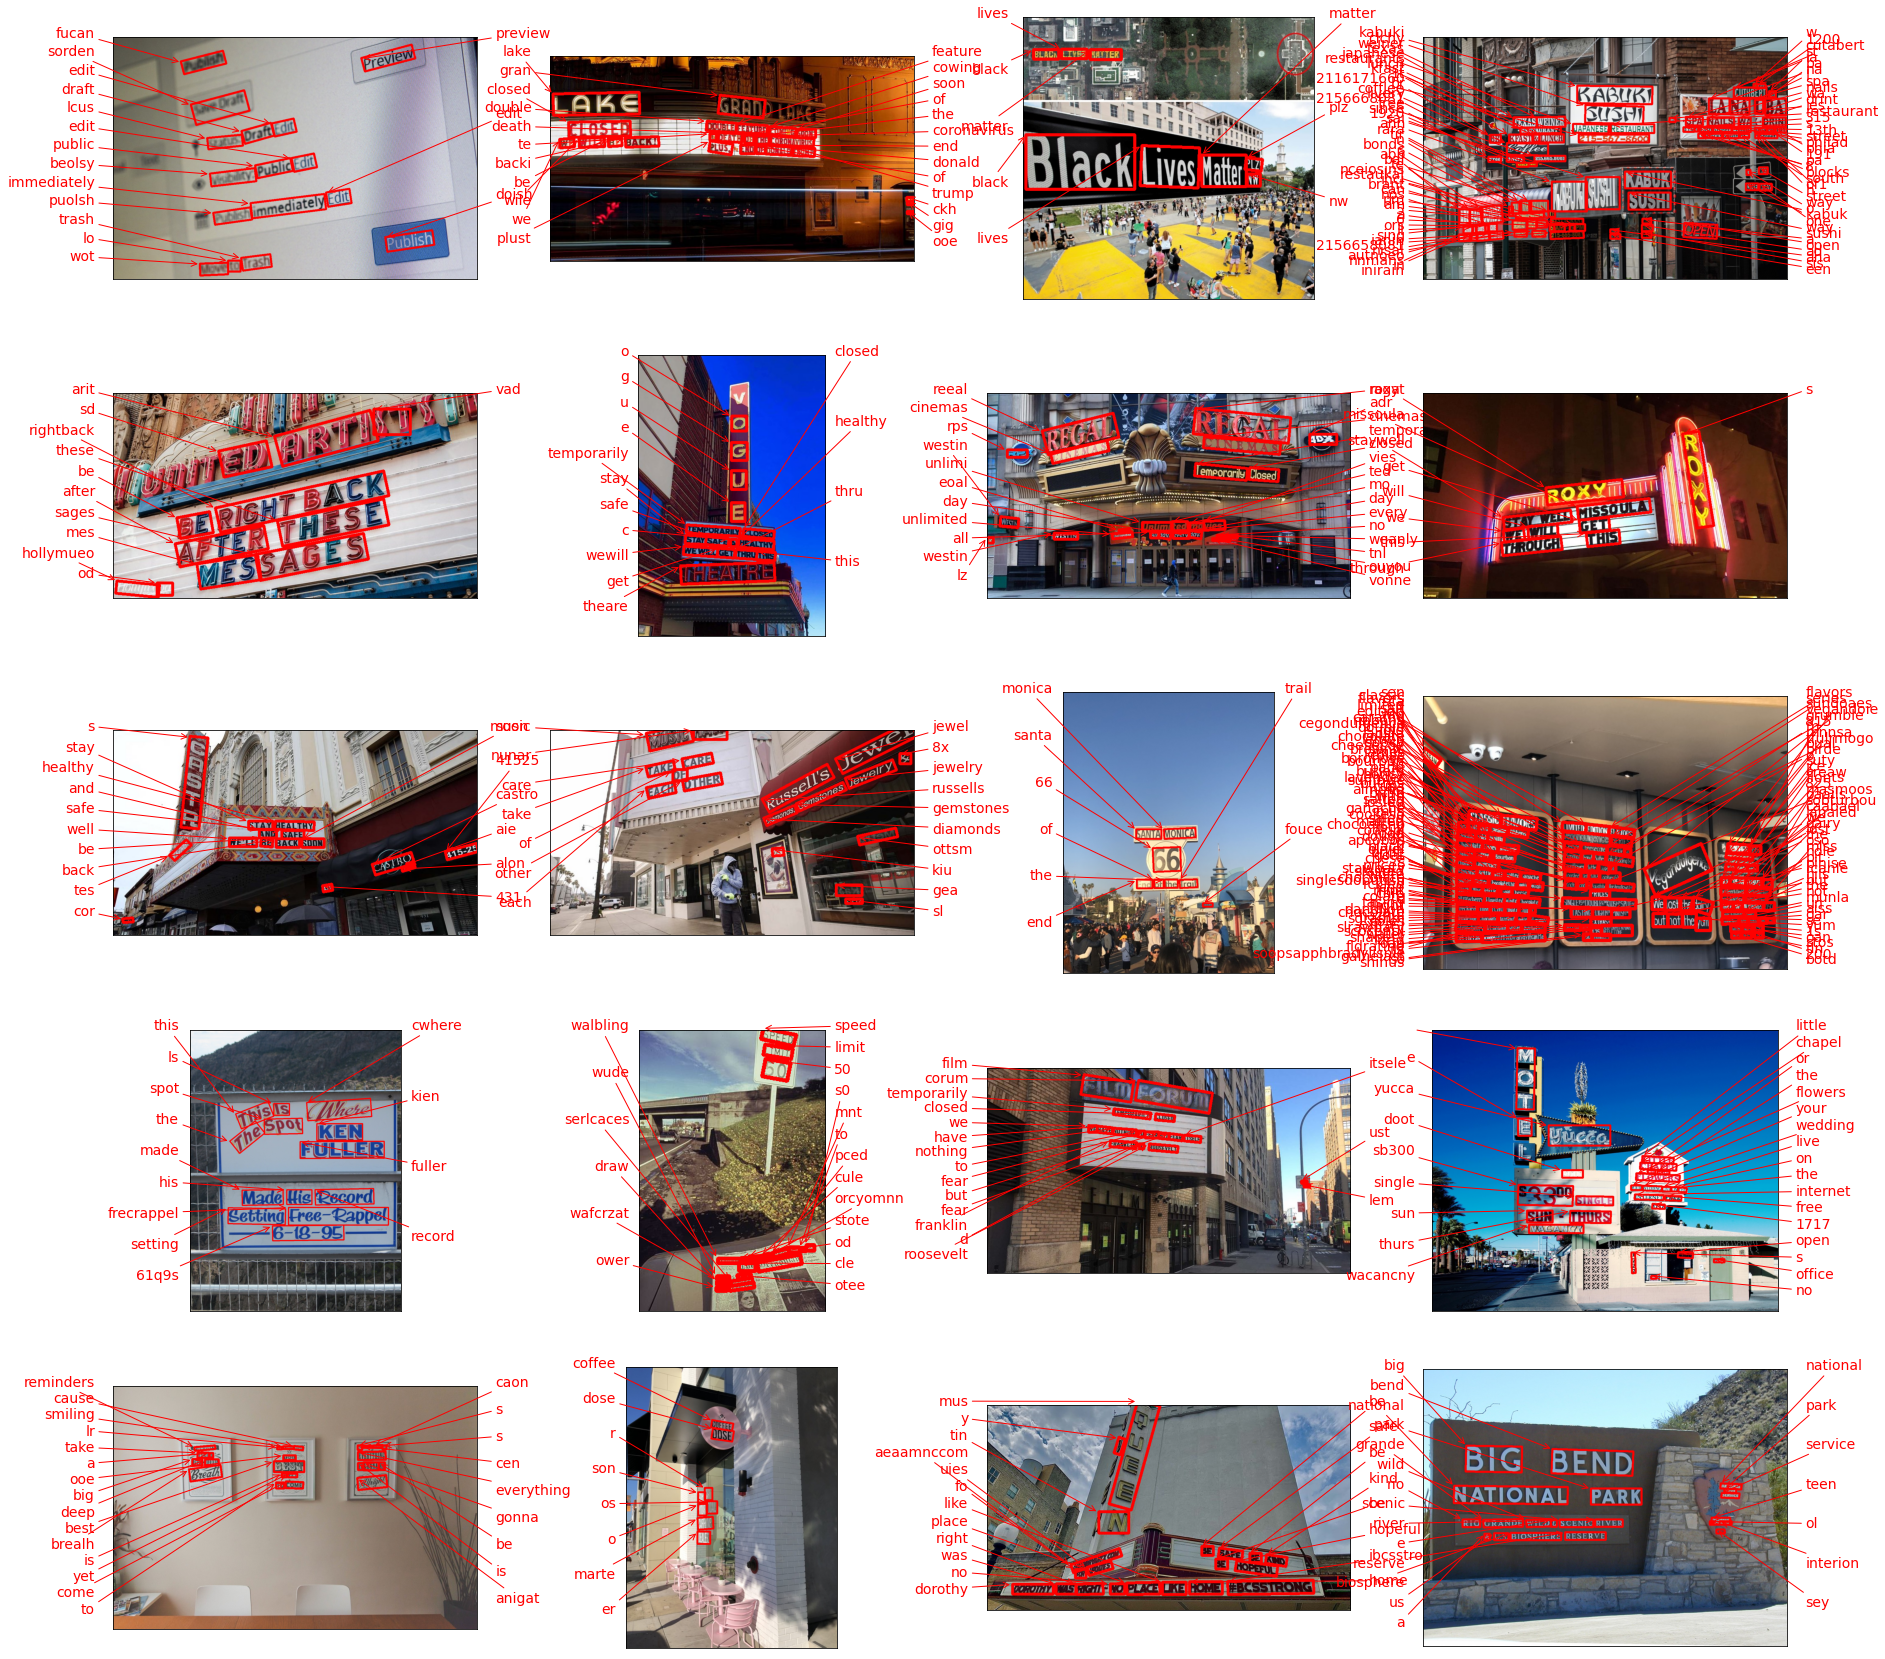

In [12]:
fig, axs = plt.subplots(5, 4, figsize=(30, 30))

for a in range(len(axs)):
    for b in range(len(axs[a])):
        keras_ocr.tools.drawAnnotations(image=images[4*a+b], 
                                    predictions=predictions[4*a+b][0], ax=axs[a,b])

전체적으로 훑어보아도 문자 인식을 꽤 잘 해낸 것을 확인할 수 있다.
***
**Tesseract**

In [14]:
# OCR Engine modes(–oem):
# 0 - Legacy engine only.
# 1 - Neural nets LSTM engine only.
# 2 - Legacy + LSTM engines.
# 3 - Default, based on what is available.

# Page segmentation modes(–psm):
# 0 - Orientation and script detection (OSD) only.
# 1 - Automatic page segmentation with OSD.
# 2 - Automatic page segmentation, but no OSD, or OCR.
# 3 - Fully automatic page segmentation, but no OSD. (Default)
# 4 - Assume a single column of text of variable sizes.
# 5 - Assume a single uniform block of vertically aligned text.
# 6 - Assume a single uniform block of text.
# 7 - Treat the image as a single text line.
# 8 - Treat the image as a single word.
# 9 - Treat the image as a single word in a circle.
# 10 - Treat the image as a single character.
# 11 - Sparse text. Find as much text as possible in no particular order.
# 12 - Sparse text with OSD.
# 13 - Raw line. Treat the image as a single text line, bypassing hacks that are Tesseract-specific.

def crop_word_regions(image_path='./images/sample.png', output_path='./output'):
    if not os.path.exists(output_path):
        os.mkdir(output_path)
    custom_oem_psm_config = r'--oem 3 --psm 3'
    image = Image.open(image_path)

    recognized_data = pytesseract.image_to_data(
        image, lang='eng',    # 한국어라면 lang='kor'
        config=custom_oem_psm_config,
        output_type=Output.DICT
    )
    
    top_level = max(recognized_data['level'])
    index = 0
    cropped_image_path_list = []
    for i in range(len(recognized_data['level'])):
        level = recognized_data['level'][i]
    
        if level == top_level:
            left = recognized_data['left'][i]
            top = recognized_data['top'][i]
            width = recognized_data['width'][i]
            height = recognized_data['height'][i]
            
            output_img_path = os.path.join(output_path, f"{str(index).zfill(4)}.png")
            print(output_img_path)
            cropped_image = image.crop((
                left,
                top,
                left+width,
                top+height
            ))
            cropped_image.save(output_img_path)
            cropped_image_path_list.append(output_img_path)
            index += 1
    return cropped_image_path_list


work_dir = os.getenv('HOME')+'/aiffel/ocr_python/output'
cropped_image_path_list = crop_word_regions(images_path[1], work_dir)

/home/aiffel/aiffel/ocr_python/output/0000.png
/home/aiffel/aiffel/ocr_python/output/0001.png
/home/aiffel/aiffel/ocr_python/output/0002.png
/home/aiffel/aiffel/ocr_python/output/0003.png
/home/aiffel/aiffel/ocr_python/output/0004.png
/home/aiffel/aiffel/ocr_python/output/0005.png
/home/aiffel/aiffel/ocr_python/output/0006.png
/home/aiffel/aiffel/ocr_python/output/0007.png
/home/aiffel/aiffel/ocr_python/output/0008.png
/home/aiffel/aiffel/ocr_python/output/0009.png
/home/aiffel/aiffel/ocr_python/output/0010.png
/home/aiffel/aiffel/ocr_python/output/0011.png


In [15]:
def recognize_images(cropped_image_path_list):
    custom_oem_psm_config = r'--oem 3 --psm 7'
    
    for image_path in cropped_image_path_list:
        image = Image.open(image_path)
        recognized_data = pytesseract.image_to_string(
            image, lang='eng',    # 한국어라면 lang='kor'
            config=custom_oem_psm_config,
            output_type=Output.DICT
        )
        print(recognized_data['text'])
    print("Done")

# 위에서 준비한 문자 영역 파일들을 인식하여 얻어진 텍스트를 출력합니다.
recognize_images(cropped_image_path_list)


ATURE

C


OF

| ME

PLUS.

Ys

LAD

OF

OU

sisi it = T b

Done


맨 처음 진행했던 google OCR처럼 이미지의 갯수가 너무 많아 google OCR과 같은 이미지로 확인해 보았다.  
3개의 모델중에서 최악의 결과를 마주한 것 같다.  
서두에 OCR을 적용하는 부분에서 가중 중요하게 여기는 부분은 간판의 사진을 입력했을 때 가게의 이름이 명확히 인식이 되어야 하는 부분이었다.  
그런 면에서 확인했을때 google OCR이나 keras-ocr의 성능이 테서랙트에 비하여 월등히 뛰어나 보인다.  
따라서 테서랙트를 제외한 2가지의 모델로 추가적인 성능평가를 진행해야 하는 것으로 판단된다.
***
**회고록**  
개인적인 생각으로는 각 모델들 전부 bounding box 영역을 가시적으로 보여주고 싶었지만  
어떻게 해야 그렇게 코드를 짤 수 있을지가 막막한 느낌이었다.  
물론 시간을 충분히 들인다면 그렇게 만들 수 있을 것 같긴 하지만 그렇게까지 중요도를 높게 주고 싶지는 않았다.  
그래도 생각보다 문자 인식이 수월하게 된다는 부분이 흥미롭게 다가왔다.  
기술이 좀더 발전하여 문자 인식을 통한 번역이나 실시간 추천 등의 시스템을 도입해보는 것도 좋은 도전이 될 것 같다.